DIVYANSH GADWAL (2104107017)

# ***BioDoopDetective*** : *Predictive Analysis on Risk Factors associated with Obesity/Overweight*

PHASE-1 : **IMPLEMENTATION**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (9, 7)
plt.rcParams['font.size'] = 14

In [ ]:
!pip install xport

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 44.7 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
bigframes 0.18.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 1.3.5 which is incompatible.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 1.3.5 which is incompatible.
plotnine 0.12.4 requires pandas>=1.5.0, but you have pandas 1.3.5 which is incompatible.
xarray 2023.7.0 requires pandas>=1.4, but you have pandas 1.3.5 which is incompatible.


In [ ]:
import xport.v56

## Uploading datasets from local file system and uploading to google colab using the code below:

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving P_BMX.XPT to P_BMX.XPT
Saving P_DEMO.XPT to P_DEMO.XPT
Saving P_DIQ.XPT to P_DIQ.XPT
Saving P_DPQ.XPT to P_DPQ.XPT
Saving P_PAQ.XPT to P_PAQ.XPT
Saving P_SLQ.XPT to P_SLQ.XPT
Saving P_SMQ.xpt to P_SMQ.xpt
User uploaded file "P_BMX.XPT" with length 2520640 bytes
User uploaded file "P_DEMO.XPT" with length 3614720 bytes
User uploaded file "P_DIQ.XPT" with length 3361520 bytes
User uploaded file "P_DPQ.XPT" with length 791280 bytes
User uploaded file "P_PAQ.XPT" with length 1321440 bytes
User uploaded file "P_SLQ.XPT" with length 777200 bytes
User uploaded file "P_SMQ.xpt" with length 1428560 bytes


### Demographic Variables and Sample Weights (P_DEMO) Dataset
---
SEQN - Respondent sequence number<br>
RIAGENDR - Gender<br>
  - 1: Male
  - 2: Female<br>
  - .: Missing<br>

RIDAGEYR - Age in years at screening<br>
  - 0 to 79: Range of values
  - 80: 80 years and over
  - .: missing<br>

RIDRETH3 - Race/Hispanic origin<br>
   - 1: Mexican American
   - 2: Other Hispanic
   - 3: None-Hispanic White
   - 4: None-Hispanic Black
   - 6: None-Hispanic Asian
   - 7: Other Race - Including Multi-Racial
   - .: Missing<br>

DMDBORN4 - Country of birth<br>
  - 1: Born in 50 US states or Washinton, DC
  - 2: Others
  - 77: Refused
  - 99: Don't Know
  - .: Missing
  <br>

DMDEDUC2 - Education level - Adults 20+<br>
  - 1: Less than 9th grade
  - 2: 9-11th grade(Includes 12th grade with no diploma)
  - 3: High School graduate/GED or equivalent
  - 4: Some college or AA degree
  - 5: College graduate or above
  - 7: Refused
  - 9 :Don't know
  - .: Missing<br>

INDFMPIR - Ratio of family income to poverty
  - 0 to 4.98: Range of values
  - 5: Value greater than or equal to 5.00
  - .: Missing



In [ ]:
# Demographic variables dataset
df_demo = pd.read_sas('/content/P_DEMO.XPT')
df_demo = df_demo[["SEQN", "RIAGENDR", "RIDAGEYR", "RIDRETH3",
                   "DMDBORN4", "DMDEDUC2","INDFMPIR"]]
df_demo.head()

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH3,DMDBORN4,DMDEDUC2,INDFMPIR
0,109263.0,1.0,2.0,6.0,1.0,NaN,4.66
1,109264.0,2.0,13.0,1.0,1.0,NaN,0.83
2,109265.0,1.0,2.0,3.0,1.0,NaN,3.06
3,109266.0,2.0,29.0,6.0,2.0,5.0,5.00
4,109267.0,2.0,21.0,2.0,2.0,4.0,5.00


### Body Measures (P_BMX) Dataset
---
SEQN - Respondent sequence number<br>
BMXWT - Weight (kg)<br>
  - 3.3 to 254.3: Range of Values
  - .: Missing<br>
  
BMXBMI - Body Mass Index (kg/m**2)<br>
  - 11.9 to 92.3: Range of Values
  - .: Missing<br>



In [ ]:
# Body Measures dataset
df_bodymeasures = pd.read_sas('/content/P_BMX.XPT')
df_bodymeasures = df_bodymeasures[["SEQN", "BMXWT","BMXHT","BMXBMI"]]
df_bodymeasures.head()

,SEQN,BMXWT,BMXHT,BMXBMI
0,109263.0,NaN,NaN,NaN
1,109264.0,42.2,154.7,17.6
2,109265.0,12.0,89.3,15.0
3,109266.0,97.1,160.2,37.8
4,109269.0,13.6,NaN,NaN


### Diabetes(P_DIQ) Dataset

---
SEQN - Respondent sequence number<br>
DIQ010 - Doctor told you have diabetes<br>
  - 1: Yes
  - 2: No
  - 3: Boederline
  - 7: Refused
  - 9: Don't know
  - .: missing



In [ ]:
# Diabetes dataset
df_diabetes = pd.read_sas('/content/P_DIQ.XPT')
df_diabetes = df_diabetes[["SEQN", "DIQ010"]]
df_diabetes.head()

,SEQN,DIQ010
0,109263.0,2.0
1,109264.0,2.0
2,109265.0,2.0
3,109266.0,2.0
4,109267.0,2.0


### Physical activity(P_OAQ.XPT) dataset
---
SEQN - Respondent sequence number<br>
PAQ620 - Moderate work activity
  - 1: Yes
  - 2: No
  - 7: Refused
  - 9: Don't know
  - .: missing<br>

PAQ665 - Moderate recreational activities
  - 1: Yes
  - 2: No
  - 7: Refused
  - 9: Don't know
  - .: missing<br>

In [ ]:
# Physical activity dataset
df_activity = pd.read_sas('/content/P_PAQ.XPT')
df_activity = df_activity[["SEQN", "PAQ620", "PAQ665"]]
df_activity.head()

,SEQN,PAQ620,PAQ665
0,109266.0,2.0,1.0
1,109267.0,2.0,2.0
2,109268.0,1.0,2.0
3,109271.0,1.0,2.0
4,109273.0,2.0,1.0


### Mental health dataset

---
SEQN - Respondent sequence number
DPQ020 - Feeling down, depressed, or hopeless<br>
  - 0: Not at all
  - 1: Several days
  - 2: More than half the days
  - 3: Nearly every day
  - 7: Refused
  - 9: Don't know
  - .: Missing<br>

DPQ050 - Poor appetite or overeating<br>
  - 0: Not at all
  - 1: Several days
  - 2: More than half the days
  - 3: Nearly every day
  - 7: Refused
  - 9: Don't know
  - .: Missing<br>


In [ ]:
# Mental Health(P_DPQ.XPT) dataset
df_mentalhealth = pd.read_sas('/content/P_DPQ.XPT')
df_mentalhealth = df_mentalhealth[["SEQN","DPQ020","DPQ050"]]
df_mentalhealth.head()

,SEQN,DPQ020,DPQ050
0,109266.0,5.397605e-79,5.397605e-79
1,109271.0,1.000000e+00,5.397605e-79
2,109273.0,2.000000e+00,2.000000e+00
3,109274.0,5.397605e-79,5.397605e-79
4,109282.0,1.000000e+00,5.397605e-79


### Sleep Disorders dataset

---
SEQN - Respondent sequence number
SLD012 - Sleep hours - weekdays or workdays
  - 3 to 13.5: Range of values
  - 2: Less than 3 hours
  - 14: 14 hours or more
  - .: Missing
<br>

SLD013 - Sleep hours - weekends
  - 3 to 13.5: Range of values
  - 2: Less than 3 hours
  - 14: 14 hours or more
  - .: Missing
<br>

In [ ]:
# Sleep disorders dataset
df_sleepdisorder = pd.read_sas('/content/P_SLQ.XPT')
df_sleepdisorder= df_sleepdisorder[["SEQN","SLD012","SLD013"]]
df_sleepdisorder.head()

,SEQN,SLD012,SLD013
0,109266.0,7.5,8.0
1,109267.0,8.0,8.0
2,109268.0,8.5,8.0
3,109271.0,10.0,13.0
4,109273.0,6.5,8.0


### Smoking Cigarette Use Dataset

---
SEQN - Respondent sequence number
SMQ040 - Do you now smoke cigarettes?
- 1: Every day
- 2: Some dyas
- 3: Not at all
- 7: Refused
- 9: Don't know
-.: Missing

In [ ]:
# Smkoing habit dataset
df_smoking = pd.read_sas('/content/P_SMQ.xpt')
df_smoking= df_smoking[["SEQN","SMQ040"]]
df_smoking.head()

,SEQN,SMQ040
0,109264.0,NaN
1,109266.0,NaN
2,109267.0,NaN
3,109268.0,NaN
4,109271.0,1.0


### Merge datasets

In [ ]:
df_demo.head(), df_bodymeasures.head(), df_diabetes.head(), df_activity.head(), df_mentalhealth.head(), df_sleepdisorder.head(), df_smoking


(       SEQN  RIAGENDR  RIDAGEYR  RIDRETH3  DMDBORN4  DMDEDUC2  INDFMPIR
 0  109263.0       1.0       2.0       6.0       1.0       NaN      4.66
 1  109264.0       2.0      13.0       1.0       1.0       NaN      0.83
 2  109265.0       1.0       2.0       3.0       1.0       NaN      3.06
 3  109266.0       2.0      29.0       6.0       2.0       5.0      5.00
 4  109267.0       2.0      21.0       2.0       2.0       4.0      5.00,
        SEQN  BMXWT  BMXHT  BMXBMI
 0  109263.0    NaN    NaN     NaN
 1  109264.0   42.2  154.7    17.6
 2  109265.0   12.0   89.3    15.0
 3  109266.0   97.1  160.2    37.8
 4  109269.0   13.6    NaN     NaN,
        SEQN  DIQ010
 0  109263.0     2.0
 1  109264.0     2.0
 2  109265.0     2.0
 3  109266.0     2.0
 4  109267.0     2.0,
        SEQN  PAQ620  PAQ665
 0  109266.0     2.0     1.0
 1  109267.0     2.0     2.0
 2  109268.0     1.0     2.0
 3  109271.0     1.0     2.0
 4  109273.0     2.0     1.0,
        SEQN        DPQ020        DPQ050
 0  109

In [ ]:
merged1 = pd.merge(df_demo,df_bodymeasures, on='SEQN', how='outer')
merged1.head()

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH3,DMDBORN4,DMDEDUC2,INDFMPIR,BMXWT,BMXHT,BMXBMI
0,109263.0,1.0,2.0,6.0,1.0,NaN,4.66,NaN,NaN,NaN
1,109264.0,2.0,13.0,1.0,1.0,NaN,0.83,42.2,154.7,17.6
2,109265.0,1.0,2.0,3.0,1.0,NaN,3.06,12.0,89.3,15.0
3,109266.0,2.0,29.0,6.0,2.0,5.0,5.00,97.1,160.2,37.8
4,109267.0,2.0,21.0,2.0,2.0,4.0,5.00,NaN,NaN,NaN


In [ ]:
merged2 = pd.merge(merged1, df_diabetes, how='outer')
merged2.head()

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH3,DMDBORN4,DMDEDUC2,INDFMPIR,BMXWT,BMXHT,BMXBMI,DIQ010
0,109263.0,1.0,2.0,6.0,1.0,NaN,4.66,NaN,NaN,NaN,2.0
1,109264.0,2.0,13.0,1.0,1.0,NaN,0.83,42.2,154.7,17.6,2.0
2,109265.0,1.0,2.0,3.0,1.0,NaN,3.06,12.0,89.3,15.0,2.0
3,109266.0,2.0,29.0,6.0,2.0,5.0,5.00,97.1,160.2,37.8,2.0
4,109267.0,2.0,21.0,2.0,2.0,4.0,5.00,NaN,NaN,NaN,2.0


In [ ]:
merged3 = pd.merge(merged2, df_activity, how='outer')
merged3.head()

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH3,DMDBORN4,DMDEDUC2,INDFMPIR,BMXWT,BMXHT,BMXBMI,DIQ010,PAQ620,PAQ665
0,109263.0,1.0,2.0,6.0,1.0,NaN,4.66,NaN,NaN,NaN,2.0,NaN,NaN
1,109264.0,2.0,13.0,1.0,1.0,NaN,0.83,42.2,154.7,17.6,2.0,NaN,NaN
2,109265.0,1.0,2.0,3.0,1.0,NaN,3.06,12.0,89.3,15.0,2.0,NaN,NaN
3,109266.0,2.0,29.0,6.0,2.0,5.0,5.00,97.1,160.2,37.8,2.0,2.0,1.0
4,109267.0,2.0,21.0,2.0,2.0,4.0,5.00,NaN,NaN,NaN,2.0,2.0,2.0


In [ ]:
merged4 = pd.merge(merged3, df_mentalhealth, how='outer')
merged4.head()

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH3,DMDBORN4,DMDEDUC2,INDFMPIR,BMXWT,BMXHT,BMXBMI,DIQ010,PAQ620,PAQ665,DPQ020,DPQ050
0,109263.0,1.0,2.0,6.0,1.0,NaN,4.66,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
1,109264.0,2.0,13.0,1.0,1.0,NaN,0.83,42.2,154.7,17.6,2.0,NaN,NaN,NaN,NaN
2,109265.0,1.0,2.0,3.0,1.0,NaN,3.06,12.0,89.3,15.0,2.0,NaN,NaN,NaN,NaN
3,109266.0,2.0,29.0,6.0,2.0,5.0,5.00,97.1,160.2,37.8,2.0,2.0,1.0,5.397605e-79,5.397605e-79
4,109267.0,2.0,21.0,2.0,2.0,4.0,5.00,NaN,NaN,NaN,2.0,2.0,2.0,NaN,NaN


In [ ]:
merged5 = pd.merge(merged4, df_smoking, how='outer')
merged5.head()

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH3,DMDBORN4,DMDEDUC2,INDFMPIR,BMXWT,BMXHT,BMXBMI,DIQ010,PAQ620,PAQ665,DPQ020,DPQ050,SMQ040
0,109263.0,1.0,2.0,6.0,1.0,NaN,4.66,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
1,109264.0,2.0,13.0,1.0,1.0,NaN,0.83,42.2,154.7,17.6,2.0,NaN,NaN,NaN,NaN,NaN
2,109265.0,1.0,2.0,3.0,1.0,NaN,3.06,12.0,89.3,15.0,2.0,NaN,NaN,NaN,NaN,NaN
3,109266.0,2.0,29.0,6.0,2.0,5.0,5.00,97.1,160.2,37.8,2.0,2.0,1.0,5.397605e-79,5.397605e-79,NaN
4,109267.0,2.0,21.0,2.0,2.0,4.0,5.00,NaN,NaN,NaN,2.0,2.0,2.0,NaN,NaN,NaN


In [ ]:
df_final = pd.merge(merged5, df_sleepdisorder, how='outer')

In [ ]:
# rename the columns
df_tidy = df_final.rename(columns = {'SEQN':'SEQN','RIAGENDR':'Gender','RIDAGEYR':'Age','RIDRETH3':'Race',
                               'DMDBORN4':'CountryofBirth','DMDEDUC2':'Education',
                               'INDFMPIR':'FamIncomeRatio', 'BMXWT':'Weight','BMXHT':'Height',
                               'BMXBMI':'BMI','DIQ010':'Diabetes',
                               'PAQ620':'ModerateWorkActivity','PAQ665':'ModerateRecreationalActivities',
                               'DPQ020':'Depressed', 'DPQ050':'PoorAppetiteOvereating',
                               'SLD012':'SleepHoursWeekdays', 'SLD013':'SleepHoursWeekend', 'SMQ040':'Smoking'}, inplace = False)

In [ ]:
df_tidy.head()

,SEQN,Gender,Age,Race,CountryofBirth,Education,FamIncomeRatio,Weight,Height,BMI,Diabetes,ModerateWorkActivity,ModerateRecreationalActivities,Depressed,PoorAppetiteOvereating,Smoking,SleepHoursWeekdays,SleepHoursWeekend
0,109263.0,1.0,2.0,6.0,1.0,NaN,4.66,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,109264.0,2.0,13.0,1.0,1.0,NaN,0.83,42.2,154.7,17.6,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,109265.0,1.0,2.0,3.0,1.0,NaN,3.06,12.0,89.3,15.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,109266.0,2.0,29.0,6.0,2.0,5.0,5.00,97.1,160.2,37.8,2.0,2.0,1.0,5.397605e-79,5.397605e-79,NaN,7.5,8.0
4,109267.0,2.0,21.0,2.0,2.0,4.0,5.00,NaN,NaN,NaN,2.0,2.0,2.0,NaN,NaN,NaN,8.0,8.0


In [ ]:
# dataframe size
df_tidy.shape

(15560, 18)

### Clean Data

In [ ]:
# drop Null values based on BMI column
df_clean = df_tidy.dropna(subset=['BMI'])
df_clean

,SEQN,Gender,Age,Race,CountryofBirth,Education,FamIncomeRatio,Weight,Height,BMI,Diabetes,ModerateWorkActivity,ModerateRecreationalActivities,Depressed,PoorAppetiteOvereating,Smoking,SleepHoursWeekdays,SleepHoursWeekend
1,109264.0,2.0,13.0,1.0,1.0,NaN,0.83,42.2,154.7,17.6,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,109265.0,1.0,2.0,3.0,1.0,NaN,3.06,12.0,89.3,15.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,109266.0,2.0,29.0,6.0,2.0,5.0,5.00,97.1,160.2,37.8,2.0,2.0,1.0,5.397605e-79,5.397605e-79,NaN,7.5,8.0
7,109270.0,2.0,11.0,4.0,1.0,NaN,1.88,75.3,156.0,30.9,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,109271.0,1.0,49.0,3.0,1.0,2.0,NaN,98.8,182.3,29.7,2.0,1.0,2.0,1.000000e+00,5.397605e-79,1.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15555,124818.0,1.0,40.0,4.0,1.0,5.0,3.82,108.8,168.7,38.2,2.0,2.0,2.0,5.397605e-79,5.397605e-79,NaN,6.0,7.0
15556,124819.0,1.0,2.0,4.0,1.0,NaN,0.07,15.4,93.7,17.5,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15557,124820.0,2.0,7.0,3.0,1.0,NaN,1.22,22.9,123.3,15.1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15558,124821.0,1.0,63.0,4.0,1.0,2.0,3.71,79.5,176.4,25.5,3.0,2.0,2.0,5.397605e-79,5.397605e-79,NaN,8.0,9.0


In [ ]:
df_clean.shape

(13137, 18)

In [ ]:
# Converting 'SEQN', 'Gender', 'Race', 'CountryifBirth', 'Diabetes' from float to int
df_clean = df_clean.astype({
    'SEQN':'int', 'Gender':'int', 'Age':'int', 'Race':'int', 'CountryofBirth':'int',
    'Diabetes':'int'
    })

In [ ]:
df_clean.head()

,SEQN,Gender,Age,Race,CountryofBirth,Education,FamIncomeRatio,Weight,Height,BMI,Diabetes,ModerateWorkActivity,ModerateRecreationalActivities,Depressed,PoorAppetiteOvereating,Smoking,SleepHoursWeekdays,SleepHoursWeekend
1,109264,2,13,1,1,NaN,0.83,42.2,154.7,17.6,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,109265,1,2,3,1,NaN,3.06,12.0,89.3,15.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,109266,2,29,6,2,5.0,5.00,97.1,160.2,37.8,2,2.0,1.0,5.397605e-79,5.397605e-79,NaN,7.5,8.0
7,109270,2,11,4,1,NaN,1.88,75.3,156.0,30.9,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,109271,1,49,3,1,2.0,NaN,98.8,182.3,29.7,2,1.0,2.0,1.000000e+00,5.397605e-79,1.0,10.0,13.0


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13137 entries, 1 to 15559
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   SEQN                            13137 non-null  int64  
 1   Gender                          13137 non-null  int64  
 2   Age                             13137 non-null  int64  
 3   Race                            13137 non-null  int64  
 4   CountryofBirth                  13137 non-null  int64  
 5   Education                       8381 non-null   float64
 6   FamIncomeRatio                  11443 non-null  float64
 7   Weight                          13137 non-null  float64
 8   Height                          13137 non-null  float64
 9   BMI                             13137 non-null  float64
 10  Diabetes                        13137 non-null  int64  
 11  ModerateWorkActivity            8790 non-null   float64
 12  ModerateRecreationalActivities  

To save the data into csv file:

In [ ]:
#df_clean.to_csv('data_clean.csv')

### Visualization

#### Histogram

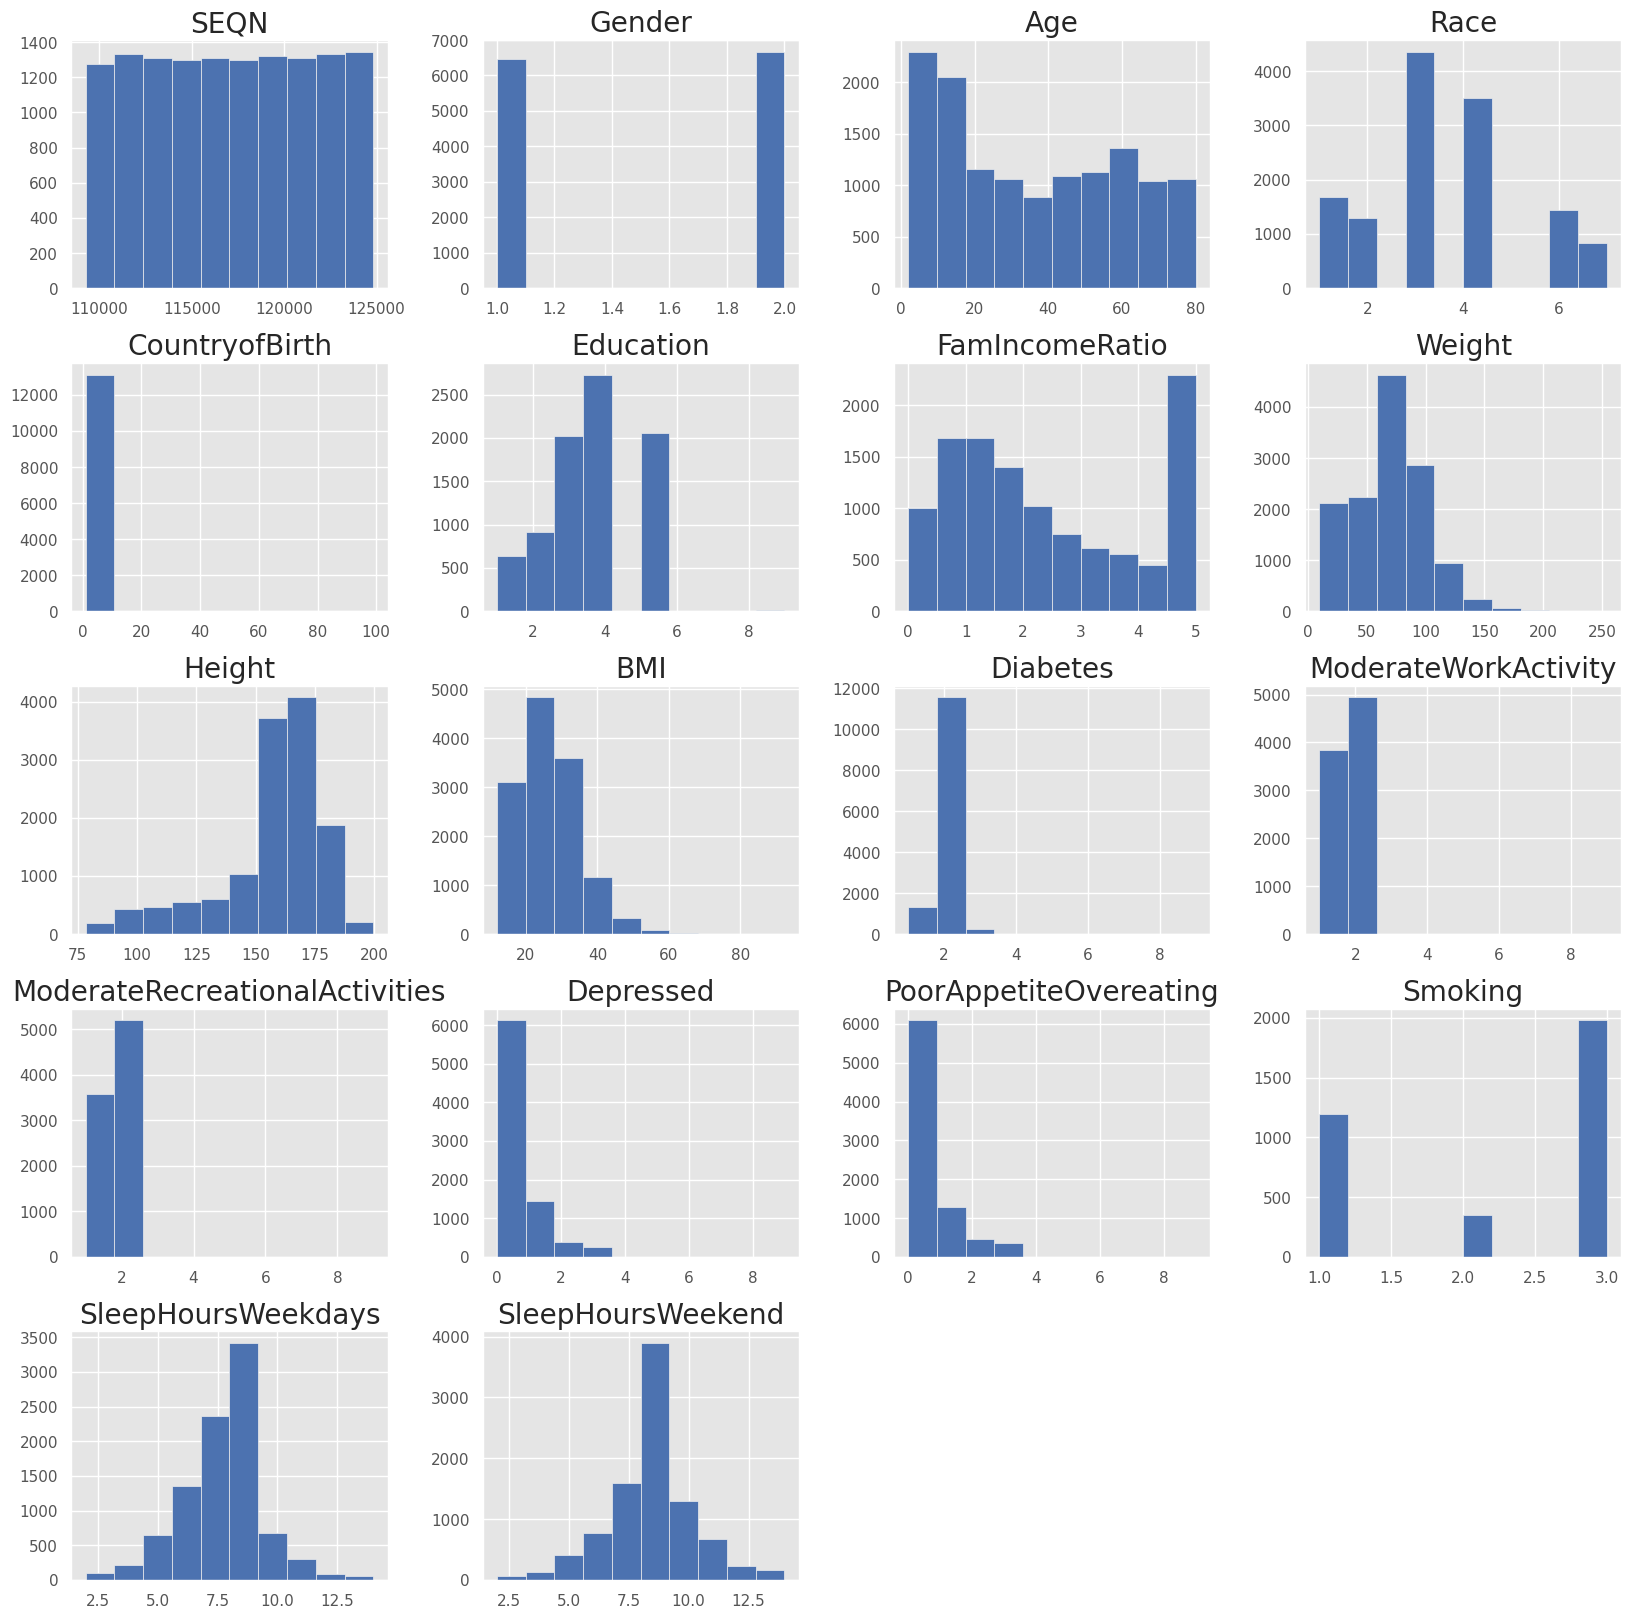

In [ ]:
# Histogram shows the data distribution
p = df_clean.hist(figsize=(20,20),color='b')

### Age and age groups

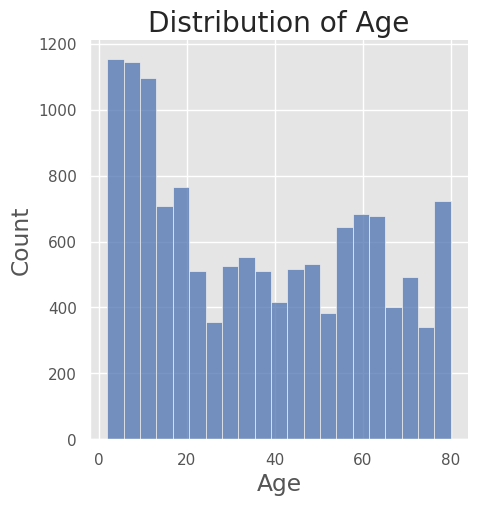

In [ ]:
# Distribution of Age
sns.displot(df_clean['Age'],color='b')
plt.title("Distribution of Age")
plt.show()

#### Creating a new column for age groups

In [ ]:
ages = pd.DataFrame(df_clean[['SEQN', 'Age']])

bins = [0, 3, 12, 19, 60, 120]
labels = ['0-3', '3-12', '13-19', '20-60', '60+']
ages['AgeGroup'] = pd.cut(ages.Age, bins, labels = labels, include_lowest= True)
df_age_groups = ages
df_age_groups

,SEQN,Age,AgeGroup
1,109264,13,13-19
2,109265,2,0-3
3,109266,29,20-60
7,109270,11,3-12
8,109271,49,20-60
...,...,...,...
15555,124818,40,20-60
15556,124819,2,0-3
15557,124820,7,3-12
15558,124821,63,60+


#### **Based on the EDA and visualization, we are going to mainly focus on the age group from 20-60.**

In [ ]:
df_with_age_groups = pd.merge(df_clean, df_age_groups, how='outer')

In [ ]:
df_with_age_groups.head()

,SEQN,Gender,Age,Race,CountryofBirth,Education,FamIncomeRatio,Weight,Height,BMI,Diabetes,ModerateWorkActivity,ModerateRecreationalActivities,Depressed,PoorAppetiteOvereating,Smoking,SleepHoursWeekdays,SleepHoursWeekend,AgeGroup
0,109264,2,13,1,1,NaN,0.83,42.2,154.7,17.6,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13-19
1,109265,1,2,3,1,NaN,3.06,12.0,89.3,15.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0-3
2,109266,2,29,6,2,5.0,5.00,97.1,160.2,37.8,2,2.0,1.0,5.397605e-79,5.397605e-79,NaN,7.5,8.0,20-60
3,109270,2,11,4,1,NaN,1.88,75.3,156.0,30.9,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3-12
4,109271,1,49,3,1,2.0,NaN,98.8,182.3,29.7,2,1.0,2.0,1.000000e+00,5.397605e-79,1.0,10.0,13.0,20-60


### Visualization of BMI
#### According to CDC, "for adults 20 years old and older, BMI is interpreted using standard weight status categories. These categories are the same for men and women of all body types and ages."
---
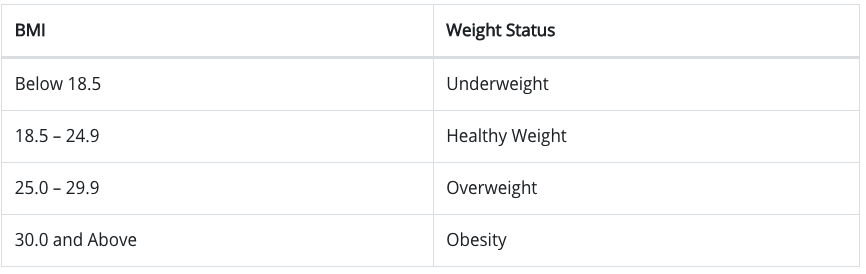


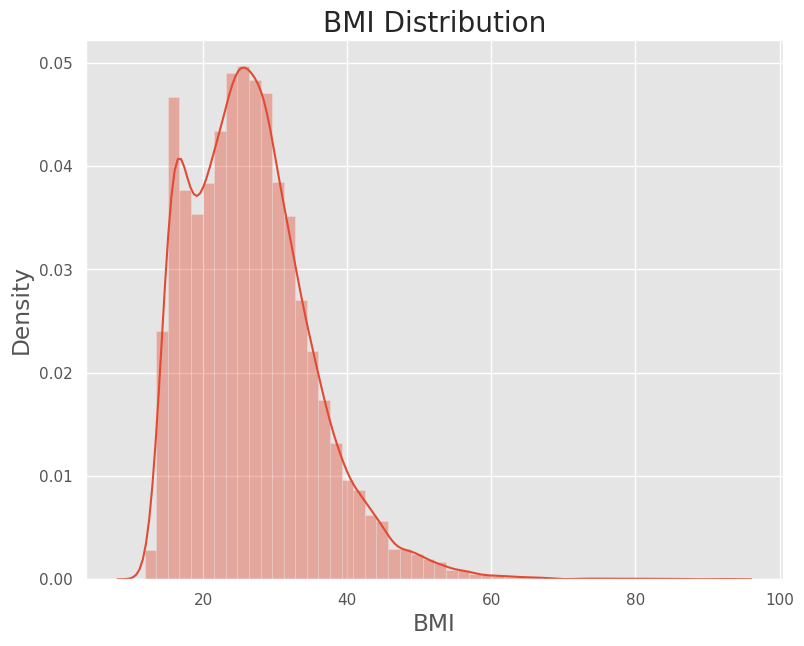

In [ ]:
sns.distplot(df_with_age_groups["BMI"])
plt.title("BMI Distribution")
plt.show()

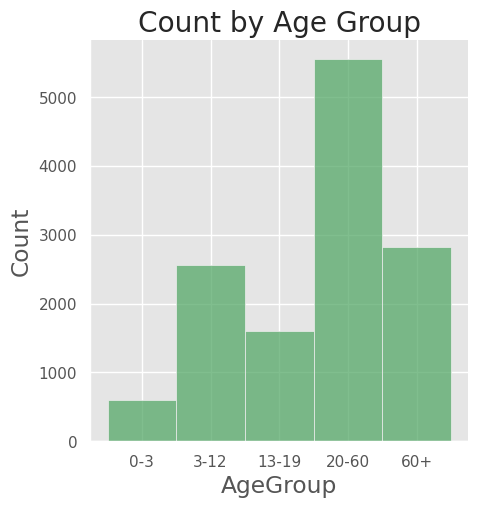

In [ ]:
sns.displot(df_with_age_groups['AgeGroup'],color='g',height=5)
plt.title("Count by Age Group")
plt.show()

### BMI and Age Groups

In [ ]:
# check BMI and age group
df_BMI_AgeGroup = df_with_age_groups[["BMI","AgeGroup"]]
df_BMI_AgeGroup.head()

,BMI,AgeGroup
0,17.6,13-19
1,15.0,0-3
2,37.8,20-60
3,30.9,3-12
4,29.7,20-60


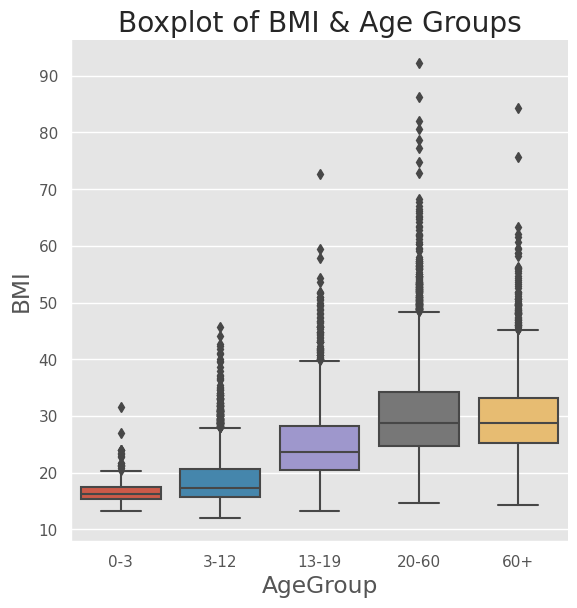

In [ ]:
sns.catplot(x="AgeGroup", y='BMI', kind='box', data=df_with_age_groups, height=6)
plt.title('Boxplot of BMI & Age Groups')
plt.show()
# box plot

#### - Since the visualizations showed that the age group of 20-60 contains the majority of the data, and education, income ratio, mental health, and other factors showed more resonable relation for adults. We decided focus on respondent from 20-60.

### Reorganizing the age groups

In [ ]:
# 20-29, 30-39, 40-49, 50-60
ages = pd.DataFrame(df_with_age_groups[['SEQN', 'Age']])

bins = [20, 30, 40, 50, 60]
labels = ['20-29', '30-39', '40-49', '50-60']
ages['AgeGroup1'] = pd.cut(ages.Age, bins, labels = labels, include_lowest= True)
df_20_60 = ages

# Drop NaN values, so we only left with people from 20-60.
df_20_60.dropna()

,SEQN,Age,AgeGroup1
2,109266,29,20-29
4,109271,49,40-49
5,109273,36,30-39
13,109284,44,40-49
15,109286,33,30-39
...,...,...,...
13124,124809,23,20-29
13125,124810,56,50-60
13128,124813,43,40-49
13130,124815,52,50-60


In [ ]:
df4 = pd.merge(df_clean, df_20_60, how="left")
df5 = df4.dropna()

In [ ]:
df5.head()

,SEQN,Gender,Age,Race,CountryofBirth,Education,FamIncomeRatio,Weight,Height,BMI,Diabetes,ModerateWorkActivity,ModerateRecreationalActivities,Depressed,PoorAppetiteOvereating,Smoking,SleepHoursWeekdays,SleepHoursWeekend,AgeGroup1
5,109273,1,36,3,1,4.0,0.83,74.3,184.2,21.9,2,2.0,1.0,2.000000e+00,2.000000e+00,1.0,6.5,8.0,30-39
33,109307,1,47,6,2,1.0,1.38,67.9,166.2,24.6,2,2.0,2.0,5.397605e-79,5.397605e-79,3.0,7.5,11.0,40-49
54,109334,2,54,3,1,2.0,1.00,59.8,156.1,24.5,2,2.0,2.0,5.397605e-79,5.397605e-79,1.0,7.0,5.0,50-60
55,109335,2,55,4,1,3.0,0.11,107.2,164.6,39.6,2,1.0,2.0,1.000000e+00,5.397605e-79,1.0,9.0,9.0,50-60
57,109337,2,48,4,2,4.0,1.18,97.8,159.4,38.5,2,2.0,2.0,5.397605e-79,5.397605e-79,3.0,5.5,9.0,40-49


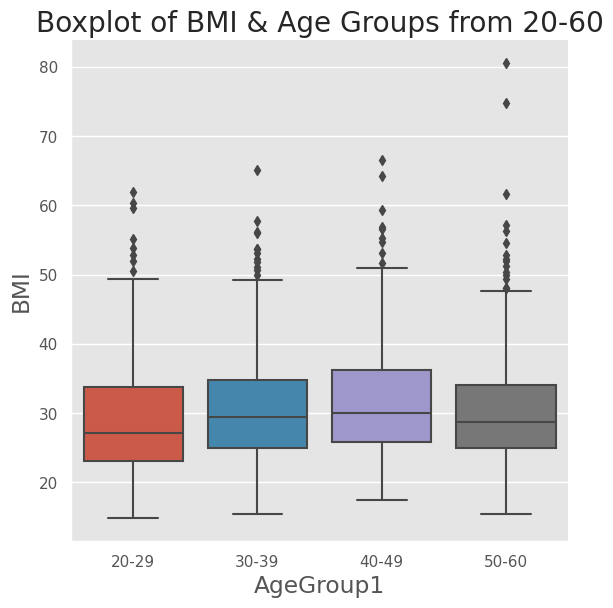

In [ ]:
# box plot of Age groups from 20-60 years old(ten years for each sub group)
sns.catplot(x="AgeGroup1", y='BMI', kind='box', data=df5, height=6)
plt.title('Boxplot of BMI & Age Groups from 20-60')
plt.show()


### BMI and Gender

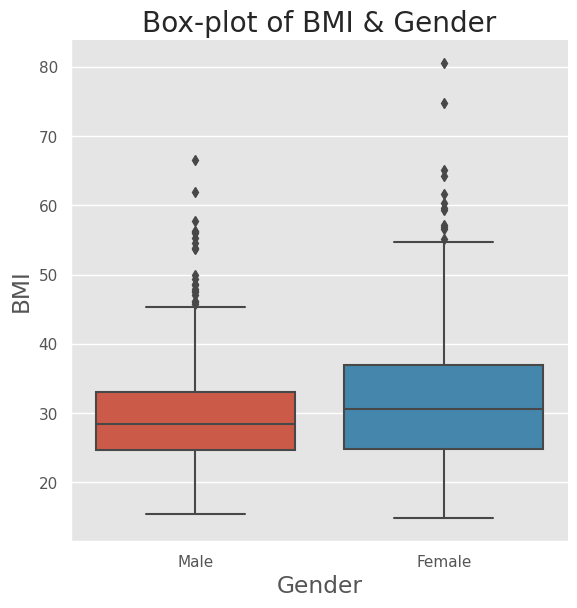

In [ ]:
b = sns.catplot(x="Gender", y="BMI", data=df5, height=6, kind='box')
plt.xticks([0, 1],['Male','Female'])
plt.title('Box-plot of BMI & Gender')
plt.show()

### BMI and Race

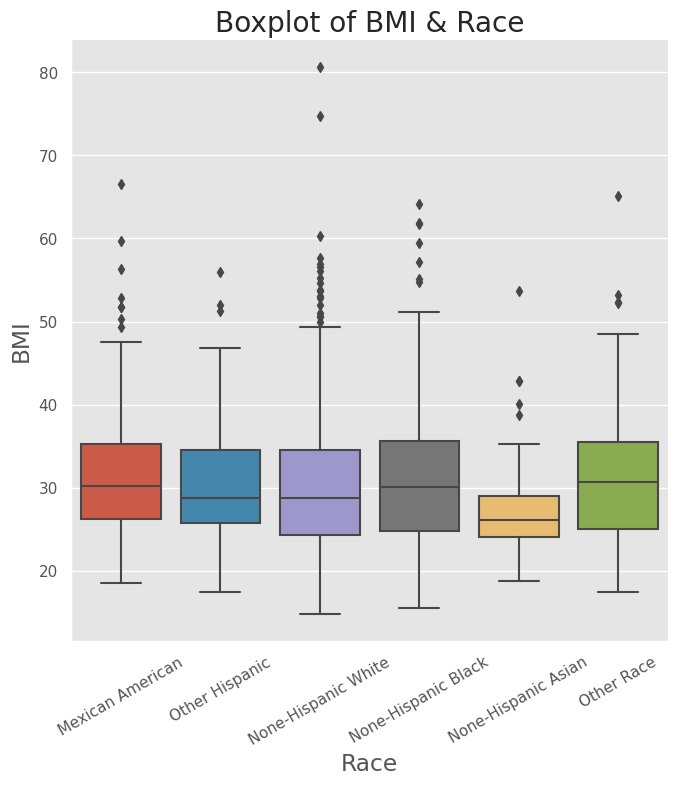

In [ ]:
sns.catplot(x="Race", y='BMI', data=df5, kind='box', height=7)
plt.title('Boxplot of BMI & Race')
plt.xticks([0, 1, 2, 3, 4, 5],['Mexican American', 'Other Hispanic',
                                  'None-Hispanic White', 'None-Hispanic Black',
                                  'None-Hispanic Asian', 'Other Race'], rotation=30)
plt.show()

### BMI and Country of Birth

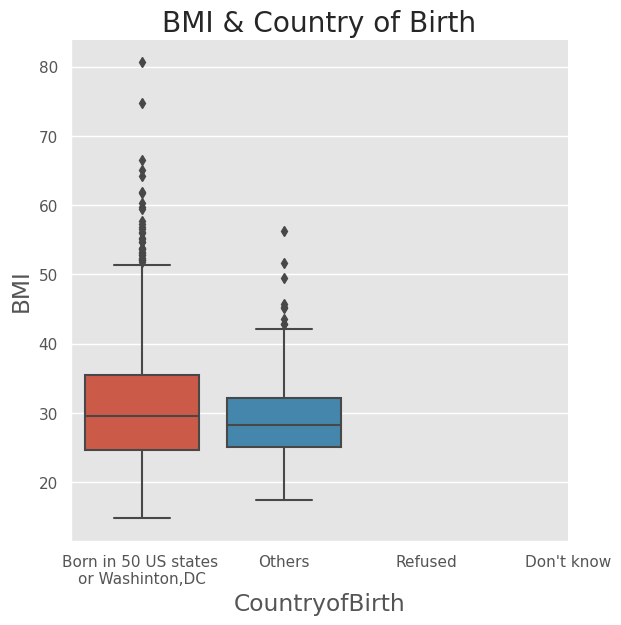

In [ ]:
sns.catplot(data=df5, x="CountryofBirth", y="BMI", kind='box', height=6)
plt.title("BMI & Country of Birth")
plt.xticks([0,1,2,3],['Born in 50 US states \nor Washinton,DC', 'Others', 'Refused', "Don't know"])
plt.show()

### BMI and Education Level

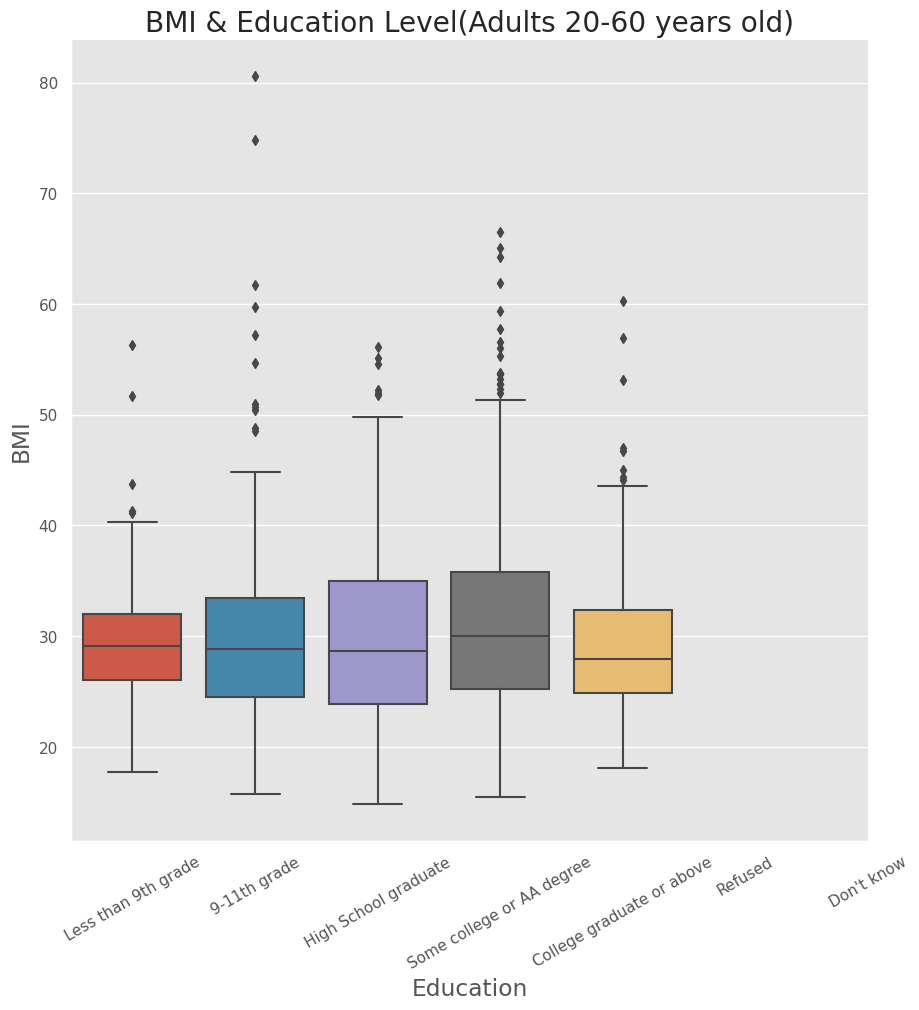

In [ ]:
## BMI and Education Level
sns.catplot(data=df5, x="Education", y="BMI", kind='box', height=9)
plt.title("BMI & Education Level(Adults 20-60 years old)")
plt.xticks([0,1,2,3,4,5,6],['Less than 9th grade','9-11th grade','High School graduate',
                            'Some college or AA degree','College graduate or above',
                            'Refused',"Don't know"], rotation=30)
plt.show()

#

0: Not at all
1: Several days
2: More than half the days
3: Nearly every day
7: Refused
9: Don't know
.: Missing

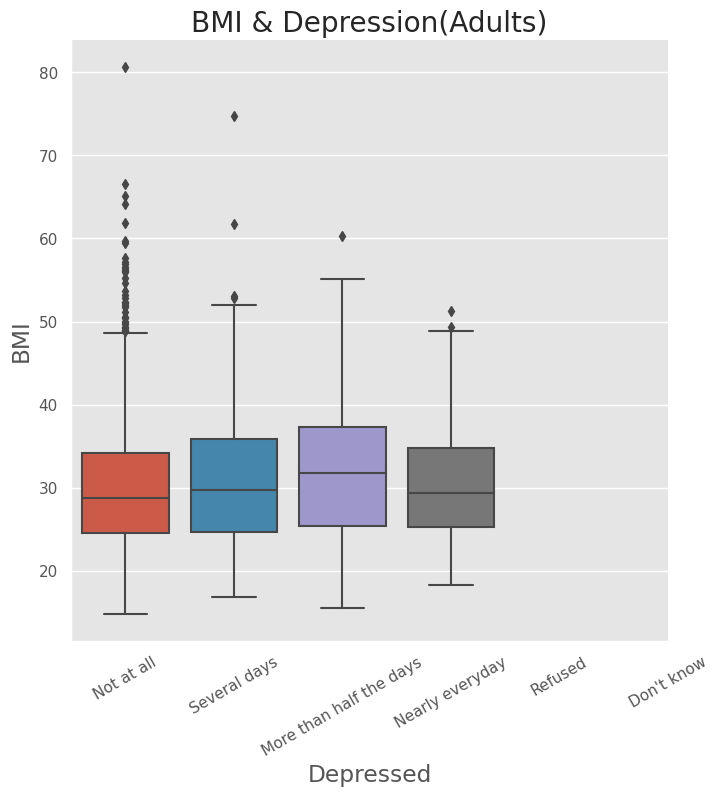

In [ ]:
# BMI and Depression
sns.catplot(data=df5, x="Depressed", y="BMI", kind='box', height=7)
plt.title("BMI & Depression(Adults)")
plt.xticks([0,1,2,3,4,5],['Not at all','Several days','More than half the days','Nearly everyday','Refused',"Don't know"], rotation=30)
plt.show()

## Phase II Implementation

### Preparing data

In [ ]:
df_s = df_with_age_groups
df_s

,SEQN,Gender,Age,Race,CountryofBirth,Education,FamIncomeRatio,Weight,Height,BMI,Diabetes,ModerateWorkActivity,ModerateRecreationalActivities,Depressed,PoorAppetiteOvereating,Smoking,SleepHoursWeekdays,SleepHoursWeekend,AgeGroup
0,109264,2,13,1,1,NaN,0.83,42.2,154.7,17.6,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13-19
1,109265,1,2,3,1,NaN,3.06,12.0,89.3,15.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0-3
2,109266,2,29,6,2,5.0,5.00,97.1,160.2,37.8,2,2.0,1.0,5.397605e-79,5.397605e-79,NaN,7.5,8.0,20-60
3,109270,2,11,4,1,NaN,1.88,75.3,156.0,30.9,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3-12
4,109271,1,49,3,1,2.0,NaN,98.8,182.3,29.7,2,1.0,2.0,1.000000e+00,5.397605e-79,1.0,10.0,13.0,20-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13132,124818,1,40,4,1,5.0,3.82,108.8,168.7,38.2,2,2.0,2.0,5.397605e-79,5.397605e-79,NaN,6.0,7.0,20-60
13133,124819,1,2,4,1,NaN,0.07,15.4,93.7,17.5,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0-3
13134,124820,2,7,3,1,NaN,1.22,22.9,123.3,15.1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3-12
13135,124821,1,63,4,1,2.0,3.71,79.5,176.4,25.5,3,2.0,2.0,5.397605e-79,5.397605e-79,NaN,8.0,9.0,60+


#### Extracting respondents with age from 20 to 60 years old.

In [ ]:
df_new = df_s[(df_s['Age'] >= 20) & (df_s['Age'] <= 60)]
df_new

,SEQN,Gender,Age,Race,CountryofBirth,Education,FamIncomeRatio,Weight,Height,BMI,Diabetes,ModerateWorkActivity,ModerateRecreationalActivities,Depressed,PoorAppetiteOvereating,Smoking,SleepHoursWeekdays,SleepHoursWeekend,AgeGroup
2,109266,2,29,6,2,5.0,5.00,97.1,160.2,37.8,2,2.0,1.0,5.397605e-79,5.397605e-79,NaN,7.5,8.0,20-60
4,109271,1,49,3,1,2.0,NaN,98.8,182.3,29.7,2,1.0,2.0,1.000000e+00,5.397605e-79,1.0,10.0,13.0,20-60
5,109273,1,36,3,1,4.0,0.83,74.3,184.2,21.9,2,2.0,1.0,2.000000e+00,2.000000e+00,1.0,6.5,8.0,20-60
13,109284,2,44,1,2,2.0,NaN,91.1,152.7,39.1,2,2.0,2.0,5.397605e-79,5.397605e-79,NaN,8.0,10.0,20-60
15,109286,2,33,6,2,5.0,1.36,72.6,158.4,28.9,2,2.0,2.0,NaN,NaN,NaN,8.5,9.0,20-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13124,124809,2,23,1,1,4.0,4.34,66.8,157.0,27.1,2,1.0,2.0,1.000000e+00,2.000000e+00,NaN,7.0,10.0,20-60
13125,124810,2,56,4,1,4.0,1.93,116.9,167.4,41.7,2,1.0,2.0,5.397605e-79,5.397605e-79,NaN,8.0,8.0,20-60
13128,124813,2,43,4,2,5.0,NaN,78.6,168.5,27.7,2,2.0,2.0,5.397605e-79,5.397605e-79,NaN,8.0,10.0,20-60
13130,124815,1,52,4,1,4.0,5.00,94.3,178.8,29.5,2,2.0,1.0,5.397605e-79,5.397605e-79,3.0,6.0,6.0,20-60


#### Creating a new column to define obesity/overweight level for each respondent data.

In [ ]:
obese_condition = [(df_new['BMI'] < 18.5),
                   (df_new['BMI'] >= 18.5) & (df_new['BMI'] < 25.0),
                   (df_new['BMI'] >= 25.0) & (df_new['BMI'] < 30.0),
                   (df_new['BMI'] > 30.0)]

# 1 - Under Weight
# 2 - Healthy
# 3 - Overweight
# 4 - Obese
obese_value = [1, 2, 3, 4]

df_new['obesity'] = np.select(obese_condition, obese_value, default = 1)

In [ ]:
df_new

,SEQN,Gender,Age,Race,CountryofBirth,Education,FamIncomeRatio,Weight,Height,BMI,Diabetes,ModerateWorkActivity,ModerateRecreationalActivities,Depressed,PoorAppetiteOvereating,Smoking,SleepHoursWeekdays,SleepHoursWeekend,AgeGroup,obesity
2,109266,2,29,6,2,5.0,5.00,97.1,160.2,37.8,2,2.0,1.0,5.397605e-79,5.397605e-79,NaN,7.5,8.0,20-60,4
4,109271,1,49,3,1,2.0,NaN,98.8,182.3,29.7,2,1.0,2.0,1.000000e+00,5.397605e-79,1.0,10.0,13.0,20-60,3
5,109273,1,36,3,1,4.0,0.83,74.3,184.2,21.9,2,2.0,1.0,2.000000e+00,2.000000e+00,1.0,6.5,8.0,20-60,2
13,109284,2,44,1,2,2.0,NaN,91.1,152.7,39.1,2,2.0,2.0,5.397605e-79,5.397605e-79,NaN,8.0,10.0,20-60,4
15,109286,2,33,6,2,5.0,1.36,72.6,158.4,28.9,2,2.0,2.0,NaN,NaN,NaN,8.5,9.0,20-60,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13124,124809,2,23,1,1,4.0,4.34,66.8,157.0,27.1,2,1.0,2.0,1.000000e+00,2.000000e+00,NaN,7.0,10.0,20-60,3
13125,124810,2,56,4,1,4.0,1.93,116.9,167.4,41.7,2,1.0,2.0,5.397605e-79,5.397605e-79,NaN,8.0,8.0,20-60,4
13128,124813,2,43,4,2,5.0,NaN,78.6,168.5,27.7,2,2.0,2.0,5.397605e-79,5.397605e-79,NaN,8.0,10.0,20-60,3
13130,124815,1,52,4,1,4.0,5.00,94.3,178.8,29.5,2,2.0,1.0,5.397605e-79,5.397605e-79,3.0,6.0,6.0,20-60,3


#### Checking if there are missing values

In [ ]:
df_new.isnull().sum()

SEQN                                 0
Gender                               0
Age                                  0
Race                                 0
CountryofBirth                       0
Education                            0
FamIncomeRatio                     755
Weight                               0
Height                               0
BMI                                  0
Diabetes                             0
ModerateWorkActivity                 0
ModerateRecreationalActivities       0
Depressed                          346
PoorAppetiteOvereating             346
Smoking                           3470
SleepHoursWeekdays                  41
SleepHoursWeekend                   48
AgeGroup                             0
obesity                              0
dtype: int64

#### Fill in NaN with mean, and mode values.

In [ ]:
df_new['FamIncomeRatio'].fillna(df_new['FamIncomeRatio'].mean(), inplace=True)
df_new['SleepHoursWeekdays'].fillna(df_new['SleepHoursWeekdays'].mean(), inplace=True)
df_new['SleepHoursWeekend'].fillna(df_new['SleepHoursWeekend'].mean(),inplace=True)

In [ ]:
mode_PoorAppetiteOvereating = df_new['PoorAppetiteOvereating'].mode()[0]
df_new['PoorAppetiteOvereating'].fillna(mode_PoorAppetiteOvereating,inplace=True)

mode_Depressed = df_new['Depressed'].mode()[0]
df_new['Depressed'].fillna(mode_Depressed,inplace=True)

mode_Smoking = df_new['Smoking'].mode()[0]
df_new['Smoking'].fillna(mode_Smoking,inplace=True)


In [ ]:
df_new.sample(10)

,SEQN,Gender,Age,Race,CountryofBirth,Education,FamIncomeRatio,Weight,Height,BMI,Diabetes,ModerateWorkActivity,ModerateRecreationalActivities,Depressed,PoorAppetiteOvereating,Smoking,SleepHoursWeekdays,SleepHoursWeekend,AgeGroup,obesity
7818,118594,1,20,7,1,4.0,2.940000,100.6,165.2,36.9,2,1.0,2.0,5.397605e-79,5.397605e-79,3.0,8.000000,7.000000,20-60,4
9053,120043,1,53,2,2,4.0,1.710000,84.5,176.9,27.0,2,1.0,2.0,5.397605e-79,5.397605e-79,3.0,7.000000,7.500000,20-60,3
10656,121951,1,60,7,1,3.0,2.060000,96.7,180.1,29.8,2,2.0,2.0,5.397605e-79,5.397605e-79,2.0,8.000000,9.500000,20-60,3
2781,112586,2,46,6,2,5.0,5.000000,51.3,154.5,21.5,2,2.0,2.0,5.397605e-79,5.397605e-79,3.0,7.500000,7.000000,20-60,2
6846,117434,1,20,3,1,3.0,5.000000,120.5,179.6,37.4,2,1.0,2.0,5.397605e-79,5.397605e-79,3.0,8.000000,10.500000,20-60,4
4755,114937,1,58,1,2,3.0,0.770000,116.8,180.4,35.9,1,1.0,1.0,5.397605e-79,5.397605e-79,3.0,7.000000,10.000000,20-60,4
2796,112605,2,35,2,2,2.0,0.820000,70.7,155.3,29.3,3,2.0,1.0,5.397605e-79,5.397605e-79,3.0,7.000000,8.000000,20-60,3
6460,116975,1,45,3,1,5.0,2.582679,73.3,192.3,19.8,2,1.0,2.0,5.397605e-79,5.397605e-79,3.0,7.452131,8.330973,20-60,2
12856,124490,1,35,3,2,3.0,3.500000,143.7,185.4,41.8,2,1.0,2.0,5.397605e-79,5.397605e-79,3.0,7.000000,9.000000,20-60,4
5382,115697,1,48,6,2,5.0,2.582679,83.9,170.4,28.9,1,2.0,1.0,5.397605e-79,5.397605e-79,3.0,6.000000,11.000000,20-60,3


In [ ]:
df_new.isnull().sum()

SEQN                              0
Gender                            0
Age                               0
Race                              0
CountryofBirth                    0
Education                         0
FamIncomeRatio                    0
Weight                            0
Height                            0
BMI                               0
Diabetes                          0
ModerateWorkActivity              0
ModerateRecreationalActivities    0
Depressed                         0
PoorAppetiteOvereating            0
Smoking                           0
SleepHoursWeekdays                0
SleepHoursWeekend                 0
AgeGroup                          0
obesity                           0
dtype: int64

Now we don't have null values in the dataset.

### Correlation

In [ ]:
# Correlation matrix
df_new.corr()

,SEQN,Gender,Age,Race,CountryofBirth,Education,FamIncomeRatio,Weight,Height,BMI,Diabetes,ModerateWorkActivity,ModerateRecreationalActivities,Depressed,PoorAppetiteOvereating,Smoking,SleepHoursWeekdays,SleepHoursWeekend,obesity
SEQN,1.000000,-0.023369,-0.007445,0.014775,-0.010915,-0.008987,-0.012094,-0.007955,0.020363,-0.020691,0.008961,-0.042179,0.004048,0.015148,0.031096,-0.016838,0.025308,-0.020349,-0.013078
Gender,-0.023369,1.000000,-0.003109,-0.002004,0.027692,0.050350,-0.060783,-0.226855,-0.679211,0.063207,0.006131,0.119178,0.035372,0.064646,0.090712,0.091886,0.095875,0.106286,0.004247
Age,-0.007445,-0.003109,1.000000,0.021534,0.019363,-0.034070,0.104067,0.059094,-0.054176,0.089508,-0.166049,0.112099,0.063269,-0.002434,-0.023996,-0.021471,-0.089835,-0.112780,0.110331
Race,0.014775,-0.002004,0.021534,1.000000,-0.013686,0.268480,0.104825,-0.070562,0.038879,-0.101287,-0.005574,0.060657,-0.038280,-0.032905,-0.037529,-0.004805,-0.015052,-0.079326,-0.133777
CountryofBirth,-0.010915,0.027692,0.019363,-0.013686,1.000000,-0.025522,-0.015775,-0.066234,-0.087772,-0.035289,0.003177,0.044667,0.018773,-0.020618,0.022500,0.051228,0.011665,0.020934,-0.018168
Education,-0.008987,0.050350,-0.034070,0.268480,-0.025522,1.000000,0.426444,0.006508,0.111466,-0.045920,0.066633,0.023842,-0.216943,-0.075756,-0.067949,0.166025,-0.037345,-0.072496,-0.058438
FamIncomeRatio,-0.012094,-0.060783,0.104067,0.104825,-0.015775,0.426444,1.000000,-0.002348,0.105665,-0.055253,0.044494,0.037775,-0.186991,-0.135623,-0.110922,0.227704,-0.063871,-0.031303,-0.024366
Weight,-0.007955,-0.226855,0.059094,-0.070562,-0.066234,0.006508,-0.002348,1.000000,0.407036,0.902672,-0.099872,-0.084352,0.019215,0.031768,0.114104,0.013035,-0.070877,-0.051409,0.726016
Height,0.020363,-0.679211,-0.054176,0.038879,-0.087772,0.111466,0.105665,0.407036,1.000000,-0.011945,-0.000771,-0.135094,-0.087758,-0.025312,-0.038155,-0.112326,-0.056838,-0.100603,0.015314
BMI,-0.020691,0.063207,0.089508,-0.101287,-0.035289,-0.045920,-0.055253,0.902672,-0.011945,1.000000,-0.105750,-0.031501,0.061449,0.047328,0.144573,0.059542,-0.051732,-0.010704,0.787663


- We can clearly see that Obesity is highly correlated to Weight(0.73) and BMI(0.79). Because BMI is based on weight and other factors, and Obesity level is defined based on BMI.
- We decided to drop Weight and BMI in order to use other factors to train the model.

### Drop Variables

In [ ]:
df_new.drop(['SEQN'],axis=1,inplace=True)
df_new.drop(['Weight'],axis=1, inplace=True)
df_new.drop(['BMI'],axis=1, inplace=True)
df_new.drop('AgeGroup', axis=1, inplace=True) # dropped agegroup column that created for EDA

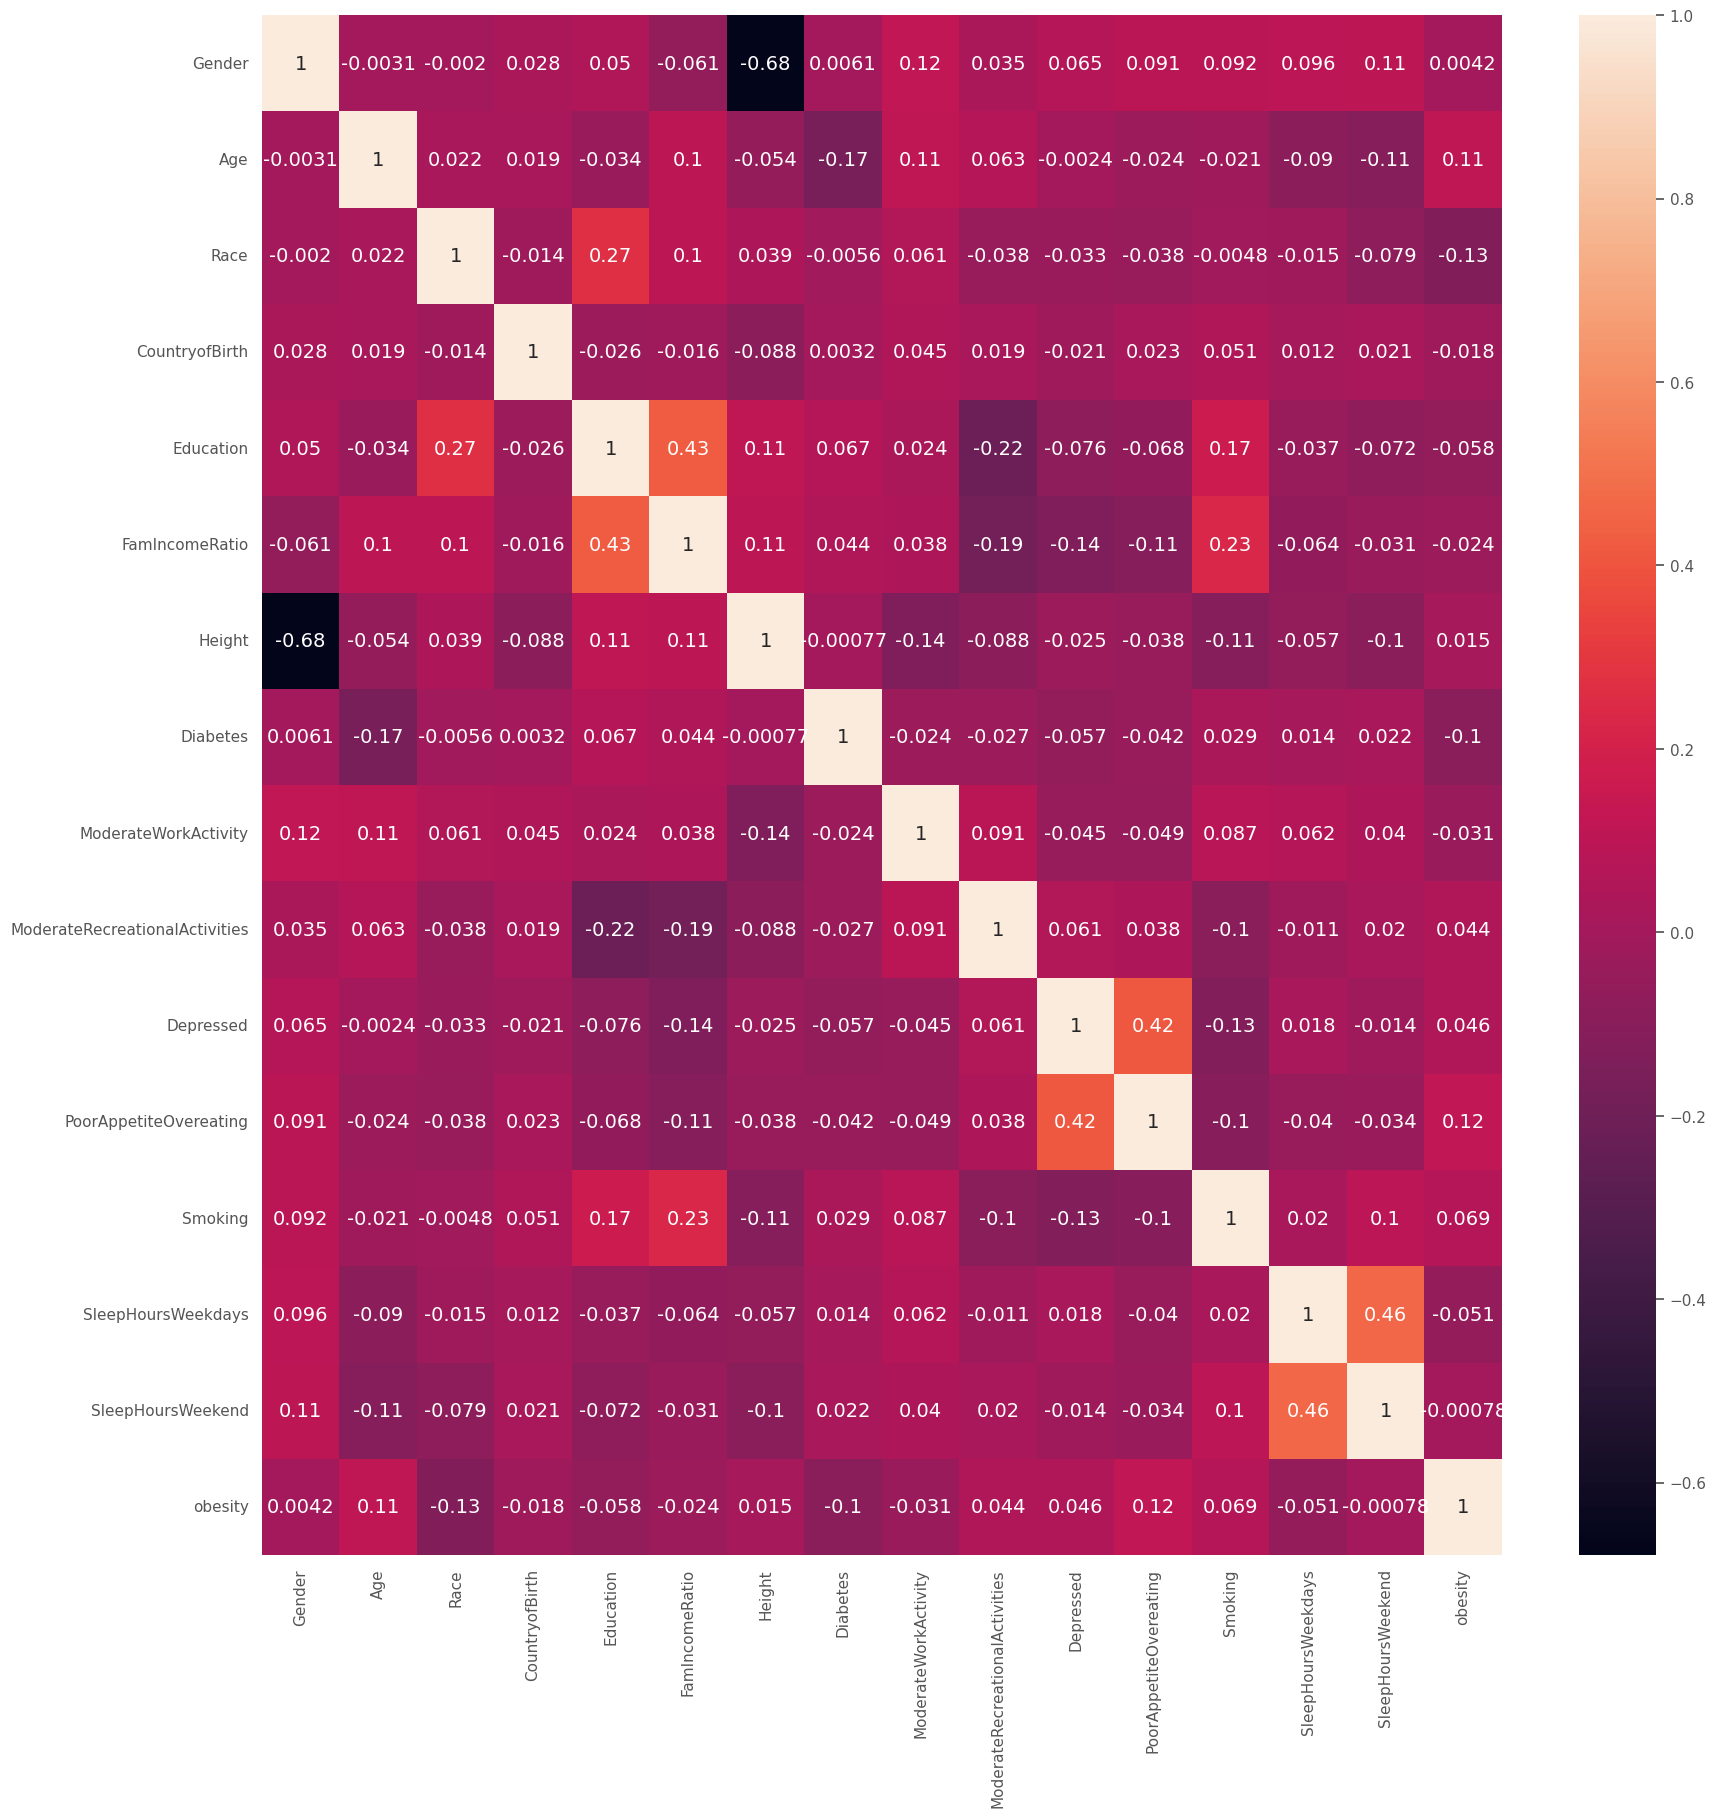

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df_new.corr(), annot=True);

#### Plot the distribution of obesity level

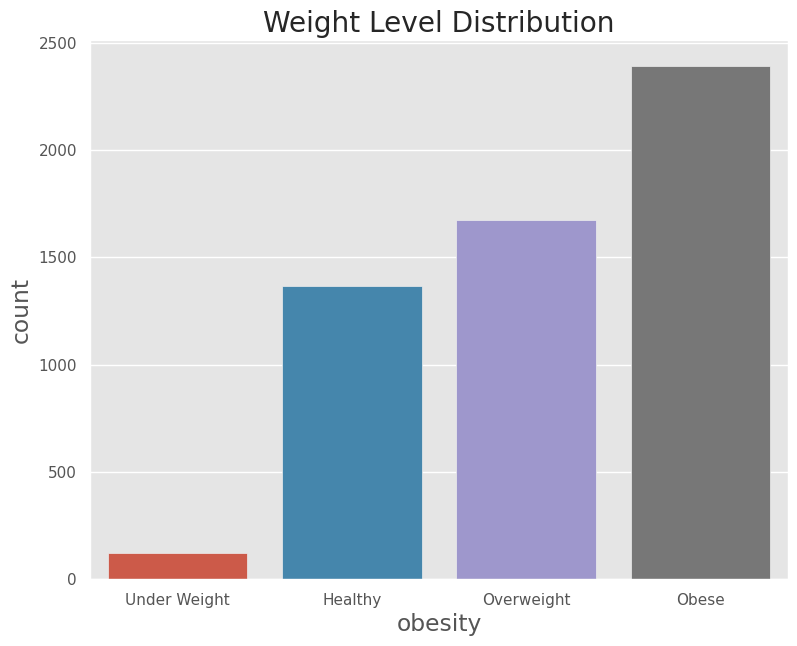

In [ ]:
sns.countplot(x='obesity', data=df_new)
plt.title('Weight Level Distribution')
positions=(0, 1, 2, 3)
labels=("Under Weight", "Healthy", "Overweight", "Obese")
plt.xticks(positions, labels)
plt.show();

 - 1 - Under Weight
 - 2 - Healthy
 - 3 - Overweight
 - 4 - Obese

- From this countplot we can see that in 5556 respondents from 20~60 years old in our dataset, about 2400 respondents are obese, 1600 respondents are overweight.

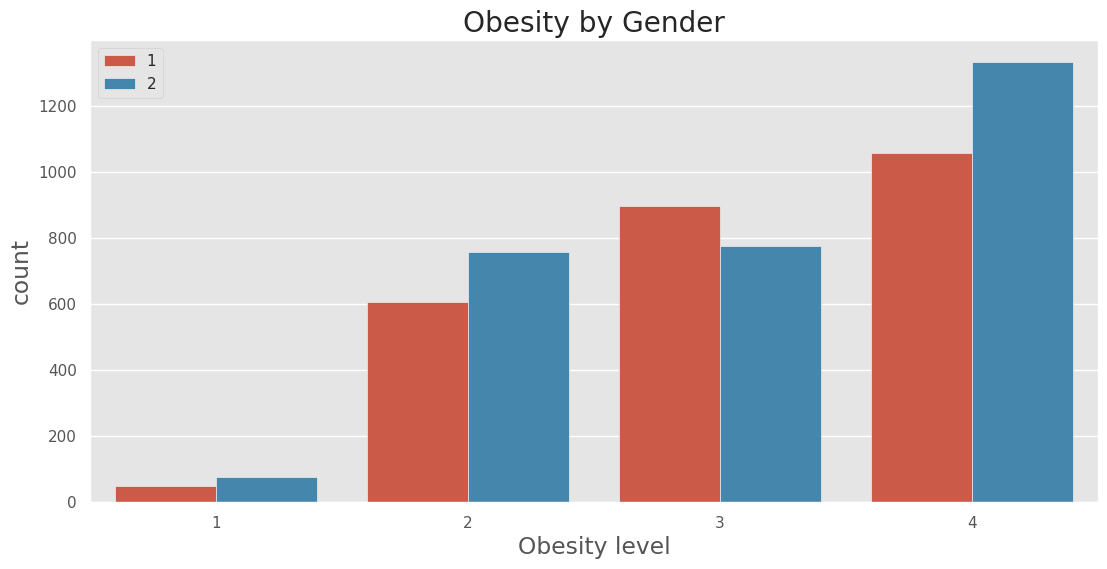

In [ ]:
# obesity level by Gender
fig = plt.figure(figsize = (13, 6))
sns.countplot(data=df_new, x='obesity', hue='Gender')
plt.xlabel("Obesity level")
plt.title('Obesity by Gender')
plt.legend(loc='best')
plt.show()